# Abalone Dataset: Predicción de Edad con Machine Learning

En este notebook aprenderemos cómo predecir la edad de un abulón usando sus características físicas y prácticas con modelos de regresión lineal y avanzados como Random Forest.

## Conceptos principales
- **Regresión**: Técnica de machine learning supervisado para predecir una variable continua (por ejemplo, edad).
- **EDA (Análisis exploratorio de datos)**: Primer paso para conocer, visualizar y comprender los datos.
- **Preprocesamiento**: Transformar variables categóricas a numéricas para el modelo.
- **Modelo básico vs avanzado**: Compararemos el desempeño de una regresión lineal simple contra un Random Forest.


In [1]:
# Librerías y carga de datos
import pandas as pd  # Para manejar tablas de datos
import matplotlib.pyplot as plt  # Para hacer gráficos
import seaborn as sns  # Para gráficos estadísticos

# Cargamos el archivo CSV con los datos de abulones
df = pd.read_csv('abalone.csv')

# Mostramos las primeras filas para ver cómo son los datos
print(df.head())


  Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7  


### ¿Qué estamos viendo?
Las primeras filas del dataframe muestran las variables disponibles. La variable objetivo aquí es **"Rings"**, que representa la edad del abulón (edad ≈ Rings + 1.5).


In [2]:
# EDA básica: exploramos la estructura y la estadística del dataset
print(df.describe())  # Estadísticas básicas de cada columna
print(df.info())     # Tipos de datos y si hay valores nulos


            Length     Diameter       Height  Whole weight  Shucked weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441500        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       Viscera weight  Shell weight        Rings  
count     4177.000000   4177.000000  4177.000000  
mean         0.180594      0.238831     9.933684  
std          0.109614      0.139203     3.224169  
min          0.000500      0.001500     1.000000  
25%          0.093500      0.130000     8.

### ¿Por qué hacer EDA?
Nos permite saber rangos, valores faltantes, tipo de variables y hacernos una idea para elegir los mejores modelos o preprocesamientos.


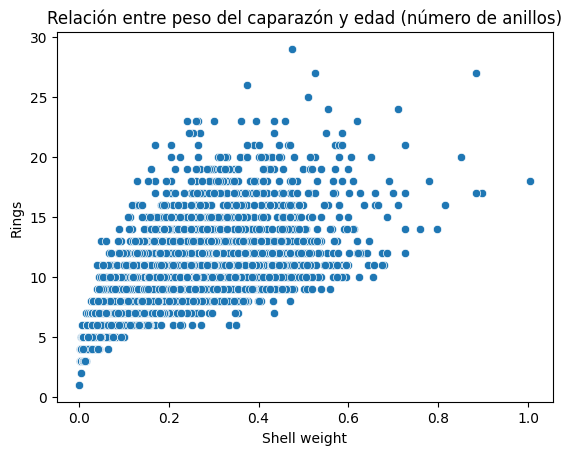

In [3]:
# Visualización de la relación entre Shell weight y Rings
# Esto nos ayuda a ver si hay relación entre el peso del caparazón y la edad
sns.scatterplot(x='Shell weight', y='Rings', data=df)
plt.title('Relación entre peso del caparazón y edad (número de anillos)')
plt.show()


#### Reflexión:  
¿Crees que el peso del caparazón es buen predictor de la edad? ¿Por qué?


In [4]:
# Preprocesamiento: convertir la columna 'Sex' en variables dummy
# Los modelos solo entienden números, así que convertimos 'Sex' en varias columnas 0/1
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)

# Mostramos cómo queda la tabla después de convertir a dummies
print(df.head())


   Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  Sex_I  Sex_M  
0         0.150     15  False   True  
1         0.070      7  False   True  
2         0.210      9  False  False  
3         0.155     10  False   True  
4         0.055      7   True  False  


**¿Por qué usar dummies?**  
Los algoritmos de ML requieren variables numéricas. Las dummies convierten categorías en columnas con valores 0/1.


In [5]:
# División en features y target + split entre entrenamiento y test
from sklearn.model_selection import train_test_split  # Para separar los datos

# X son las columnas que usaremos para predecir, y es la edad (Rings)
X = df.drop(columns=['Rings'])
y = df['Rings']

# Separamos el 80% para entrenar y el 20% para probar
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


**División de datos**
Separar datos de entrenamiento y test ayuda a medir si nuestro modelo generaliza bien y no sólo aprende de memoria.


In [6]:
# Regresión lineal simple
from sklearn.linear_model import LinearRegression  # Importamos el modelo

# Creamos el modelo de regresión lineal
lr = LinearRegression()

# Entrenamos el modelo con los datos de entrenamiento
lr.fit(X_train, y_train)

# Hacemos predicciones con los datos de test
y_pred = lr.predict(X_test)


**Regresión lineal:**  
Es la técnica más sencilla de regresión: ajusta una línea para aproximar los datos.


MSE: 5.01, R²: 0.54, RMSE: 2.24.


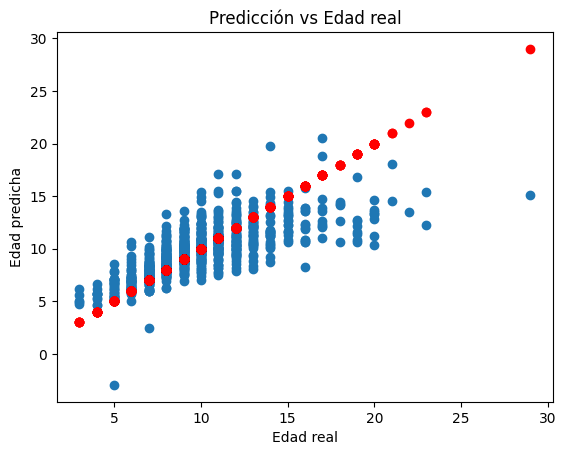

In [7]:
# Evaluación del resultado
from sklearn.metrics import mean_squared_error, r2_score  # Métricas de evaluación

# Calculamos el error medio cuadrático y el R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = mse ** 0.5
print(f'MSE: {mse:.2f}, R²: {r2:.2f}, RMSE: {rmse:.2f}.')

# Gráfico para comparar edad real vs edad predicha
plt.scatter(y_test, y_pred)
plt.scatter(y_test, y_test, color='red', label='Ideal')  # Línea ideal
plt.xlabel('Edad real')
plt.ylabel('Edad predicha')
plt.title('Predicción vs Edad real')
plt.show()


**¿Qué significan MSE y R²?**  
- El MSE (Error medio cuadrático) nos dice cuánto se equivoca el modelo en promedio.
- El R² indica qué porcentaje de la variabilidad de la edad explica el modelo.


In [17]:
# Random Forest: comparación con un modelo más avanzado
# Un Random Forest es como un "equipo" de muchos árboles de decisión.
# Cada árbol hace una predicción y el modelo final toma el promedio de todas.
# Esto suele dar mejores resultados que una sola línea (regresión lineal),
# especialmente cuando la relación entre variables no es tan simple.

from sklearn.ensemble import RandomForestRegressor  # Importamos el modelo avanzado

# Creamos el modelo Random Forest (no hace falta ajustar parámetros para empezar)
rf = RandomForestRegressor(n_estimators=200, random_state=42)

# Entrenamos el modelo con los datos de entrenamiento
rf.fit(X_train, y_train)

# Hacemos predicciones con los datos de test
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = mse_rf ** 0.5
# Calculamos el error medio cuadrático (MSE) y el R² para ver qué tan bien predice
print(f'MSE: {mse_rf:.2f}, R²: {r2_rf:.2f}, RMSE: {rmse_rf:.2f}.')

# Puedes comparar estos resultados con los de la regresión lineal.
# Si el R² es más alto y el MSE más bajo, el Random Forest está prediciendo mejor.


MSE: 4.71, R²: 0.57, RMSE: 2.17.


**Random Forest:**  
Permite ajustar modelos mucho más complejos ("conjuntos de árboles") y generalmente predice mejor en casos no lineales.

#### Espacio para tu análisis:
- ¿Cómo cambian las métricas cuando usas Random Forest versus la regresión lineal?
- ¿Existen variables que influyen más? Prueba cambiar las features y observa el impacto.


## Modelos de Boosting ##

Importación de librerias

In [11]:
# Modelos de boosting y métricas
# Importamos modelos de boosting
import numpy as np
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
# Importamos métricas
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
# Importamos XGBoost y LightGBM, como modelos de boosting avanzados
import xgboost as xgb
import lightgbm as lgb
# Configuración para evitar warnings innecesarios
import warnings
warnings.filterwarnings('ignore')  # Para no ver mensajes de advertencia
# Configuración de gráficos
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (8, 5)

### AdaBoost Regressor

In [18]:
ada_cal = AdaBoostRegressor(n_estimators=200, random_state=42)
ada_cal.fit(X_train, y_train)
y_cal_pred_ada = ada_cal.predict(X_test)
mse_cal_ada = mean_squared_error(y_test, y_cal_pred_ada)
r2_cal_ada = r2_score(y_test, y_cal_pred_ada)
rmse_cal_ada = np.sqrt(mse_cal_ada)
print(f'AdaBoost - MSE: {mse_cal_ada:.2f}, R²: {r2_cal_ada:.2f}, RMSE: {rmse_cal_ada:.2f}')

AdaBoost - MSE: 7.77, R²: 0.28, RMSE: 2.79


### Gradient Boosting Regressor

In [19]:
gbr_cal = GradientBoostingRegressor(n_estimators=200, random_state=42)
gbr_cal.fit(X_train, y_train)
y_cal_pred = gbr_cal.predict(X_test)
mse_cal = mean_squared_error(y_test, y_cal_pred)
r2_cal = r2_score(y_test, y_cal_pred)
rmse_cal = np.sqrt(mse_cal)
print(f'Gradient Boosting - MSE: {mse_cal:.2f}, R²: {r2_cal:.2f}, RMSE: {rmse_cal:.2f}')

Gradient Boosting - MSE: 4.71, R²: 0.57, RMSE: 2.17


### XGBoot Regresor

In [20]:
xgb_cal = xgb.XGBRegressor(n_estimators=200, random_state=42, verbosity=0)
xgb_cal.fit(X_train, y_train)
y_cal_pred_xgb = xgb_cal.predict(X_test)
mse_cal_xgb = mean_squared_error(y_test, y_cal_pred_xgb)
r2_cal_xgb = r2_score(y_test, y_cal_pred_xgb)
rmse_cal_xgb = np.sqrt(mse_cal_xgb)
print(f'XGBoost - MSE: {mse_cal_xgb:.2f}, R²: {r2_cal_xgb:.2f}, RMSE: {rmse_cal_xgb:.2f}')

XGBoost - MSE: 5.45, R²: 0.50, RMSE: 2.33


### LightGBM Regressor

In [21]:
lgbm_cal = lgb.LGBMRegressor(n_estimators=200, random_state=42)
lgbm_cal.fit(X_train, y_train)
y_cal_pred_lgbm = lgbm_cal.predict(X_test)
mse_cal_lgbm = mean_squared_error(y_test, y_cal_pred_lgbm)
r2_cal_lgbm = r2_score(y_test, y_cal_pred_lgbm)
rmse_cal_lgbm = np.sqrt(mse_cal_lgbm)
print(f'LightGBM - MSE: {mse_cal_lgbm:.2f}, R²: {r2_cal_lgbm:.2f}, RMSE: {rmse_cal_lgbm:.2f}')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000110 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1299
[LightGBM] [Info] Number of data points in the train set: 3341, number of used features: 9
[LightGBM] [Info] Start training from score 9.958396
LightGBM - MSE: 5.10, R²: 0.53, RMSE: 2.26


### Comparativa

,Modelo,MSE,RMSE,R2
0,Regresión Lineal,5.006879,2.237606,0.538975
1,Radom Forest,4.706353,2.169413,0.566647
2,AdaBoost,7.773224,2.788050,0.284254
3,GradientBoosting,4.711019,2.170488,0.566217
4,XGBoost,5.448330,2.334166,0.498327
5,LightGBM,5.100691,2.258471,0.530337


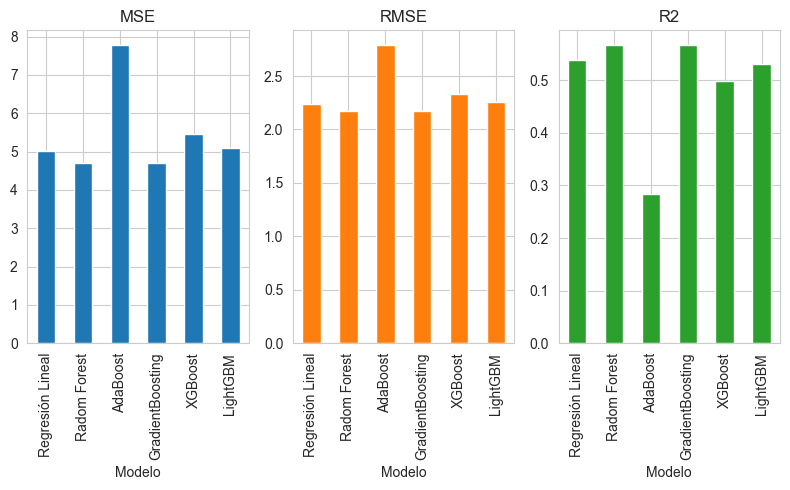

In [22]:
# --- Comparativa Abalone (Regresión) ---
resultados_cal = pd.DataFrame({
    'Modelo': ['Regresión Lineal','Radom Forest','AdaBoost', 'GradientBoosting', 'XGBoost', 'LightGBM'],
    'MSE': [mse, mse_rf, mse_cal_ada, mse_cal, mse_cal_xgb, mse_cal_lgbm],
    'RMSE': [rmse, rmse_rf, rmse_cal_ada, rmse_cal, rmse_cal_xgb, rmse_cal_lgbm],
    'R2': [r2, r2_rf, r2_cal_ada, r2_cal, r2_cal_xgb, r2_cal_lgbm]
})
display(resultados_cal)
resultados_cal.plot(x='Modelo', y=['MSE', 'RMSE', 'R2'], kind='bar', subplots=True, layout=(1,3), legend=False, title=['MSE','RMSE','R2'])
plt.tight_layout()
plt.show()